In [1]:
%pylab inline
%config InlineBackend.figure_format='retina'
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_ps02 = pd.read_csv('data/03_PS2.csv')
df_micron = df_ps02['D50_micron']
t_min = df_ps02['Time_min']
df_ps02.head()

,Time_min,D16_micron,D50_micron,D84_micron
0,1.0,12.7335,20.6013,39.3249
1,2.0,13.2074,23.8470,45.4082
2,3.0,13.8934,25.3438,65.4272
3,4.0,14.1042,25.6631,49.8698
4,5.0,10.0286,19.1833,36.1036


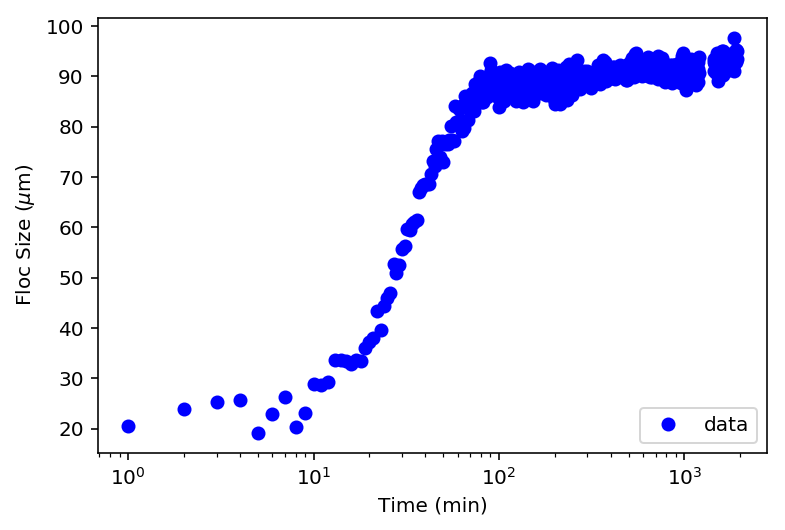

In [3]:
fig, ax = plt.subplots()
ax.plot(t_min,df_micron,'ob', label='data')
ax.set_xscale('log'),
ax.set_xlabel('Time (min)')
ax.set_ylabel('Floc Size ($\mu$m)')
legend(loc=4);

In [5]:
df = df_micron/10**6
t_sec = t_min*60

In [32]:
def f(D, t, Ka, Kb):
    """
    ODE to be integrated: dDdt = A-B
    """
    # kind of constant:
    nf = 2.25
    p = 3.-nf
    q = 0.5
    Fy = 1e-10 # (N)
    rhos = 2500.  # (kg/m3)
    mu = 1.002e-3 # dynamic viscosity @ 20 degC (N s m-2)
    
    Dp = 7e-6 # (m)
    G = 35. # (s-1)
    C = 50.e-3 # (kg/m3)
    
    # aggregation and breakup terms
    A = D**(4-nf)*Ka*Dp**(nf-3)*G*C/(nf*rhos)
    B = (D-Dp)**p * D**(2*q+1) *Kb *((Dp**(-p))/nf) *(mu/Fy)**q *G**(q+1)
    dfdt = A-B
    return dfdt

# Ka = 0.73
# Kb = 9.5e-6

# initial values
D0 = 20e-6 # (m)
t = np.linspace(60,100000.,1000)

def D(t, Ka, Kb, D0):
    """
    Solution to the ODE y'(t) = f(t,y,a,b) with initial condition y(0) = y0
    """
    D = odeint(f, D0, t, args=(Ka, Kb))
    return D.ravel()

popt, cov = curve_fit(D, t_sec, df, [0.1,0,D0])
Ka_fit, Kb_fit, D0_fit = popt

/Users/kstrom/anaconda/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [33]:
popt

array([  6.98228631e-01,   8.79375896e-06,   2.34225280e-05])

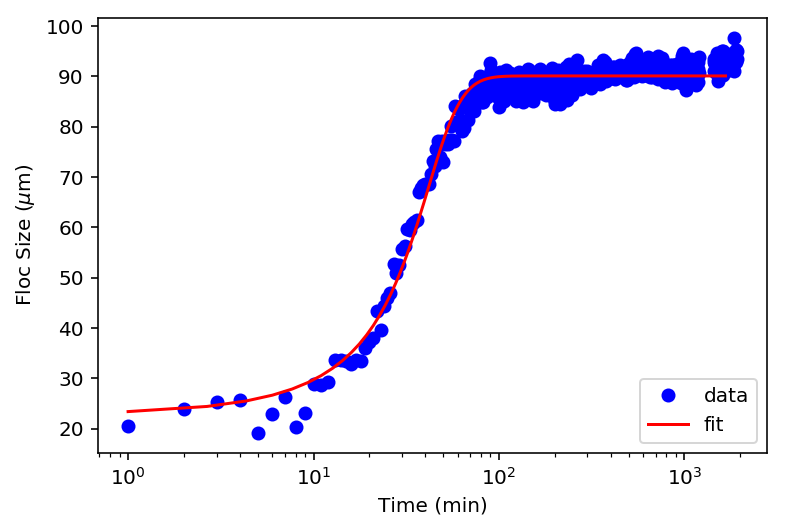

In [39]:
fig, ax = plt.subplots()
ax.plot(t_min,df_micron,'ob', label='data')
ax.plot(t/60,D(t, Ka_fit, Kb_fit, D0_fit)*10**6,'r', label='fit')
ax.set_xscale('log'),
ax.set_xlabel('Time (min)')
ax.set_ylabel('Floc Size ($\mu$m)')
legend(loc=4);